# Домашняя работа №5.

In [5]:
import io
import requests
import ssl
import pandas as pd
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import researchpy as rp
import statistics

In [6]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/cardio_train.csv"

In [7]:
data=pd.read_csv(url,sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Данный датасет разобран в начале лекции 5. Датасет больных сердечно-сосудистыми заболеваниями.
Источник: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [5]:
# Data description
# There are 3 types of input features:

# Objective: factual information;
# Examination: results of medical examination;
# Subjective: information given by the patient.

# Features:
# Age | Objective Feature | age | int (days)
# Height | Objective Feature | height | int (cm) |
# Weight | Objective Feature | weight | float (kg) |
# Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men
# Systolic blood pressure | Examination Feature | ap_hi | int ?(mmHg)| 
# Diastolic blood pressure | Examination Feature | ap_lo | int ?(mmHg)|
# Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
# Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
# Smoking | Subjective Feature | smoke | binary |
# Alcohol intake | Subjective Feature | alco | binary | ?Alcohol intake if yes then 1 otherwise it will be 0
# Physical activity | Subjective Feature | active | binary |
# Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
# All of the dataset values were collected at the moment of medical examination.

In [7]:
data.info() # пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [48]:
data.iloc[:, 1:].describe()
# в датасете есть аномальные значения, напр., ap_hi, ap_lo (они не могут быть отрицательными), height (55, 250), weight (10):

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# data.iloc[:, 1:].hist(figsize=(25,25), bins = 100)
# plt.show()

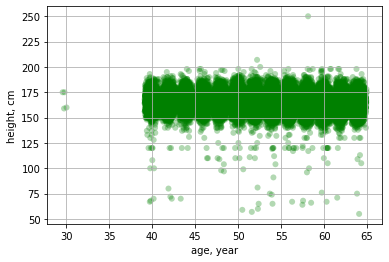

In [49]:
# смотрим выбросы
age = data['age']/365
height = data['height']
fig, ax = plt.subplots()
ax.scatter(age, height, c='green', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('age, year')
plt.ylabel('height, cm')
plt.show()

In [32]:
data.loc[data['height'] >= 250]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,9223,21220,1,250,86.0,140,100,3,1,0,0,1,1


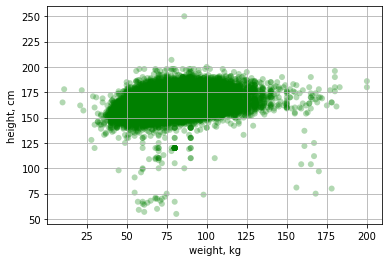

In [50]:
weight= data['weight']
height = data['height']
fig, ax = plt.subplots()
ax.scatter(weight, height, c='green', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('weight, kg')
plt.ylabel('height, cm')
plt.show()

In [5]:
len(data.loc[data['weight'] < 40])
# data.shape[0] # кол-во строк

52

In [7]:
len(data.loc[data['height'] < 140])

152

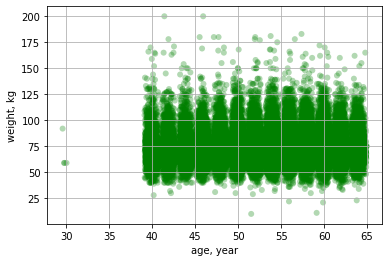

In [51]:
# age = data['age']/365
# weight = data['weight']
fig, ax = plt.subplots()
ax.scatter(age, weight, c='green', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('age, year')
plt.ylabel('weight, kg')
plt.show()

In [ ]:
# ru.wikipedia.org/wiki/Кровяное_давление#Вариация_показателей_в_норме_и_при_патологии
# https://www.healthcheckup.com/general/normal-blood-pressure-range/
# https://zen.yandex.com/media/blog_vrach/neizvestnye-fakty-o-povyshennom-davlenii-5dece5360a451800aef9ede7

In [36]:
# должно соблюдаться условие: ap_hi > ap_lo (иначе не бывает), в датасете же: 
len(data.loc[data['ap_hi'] < data['ap_lo']])

1234

In [23]:
# data.loc[data['ap_hi'] < data['ap_lo']].head()

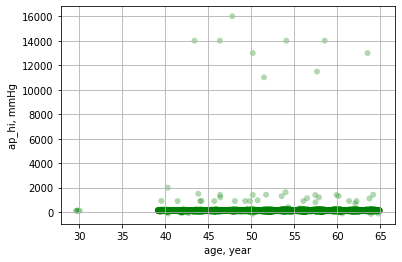

In [52]:
# age = data['age']/365
ap_hi = data['ap_hi']
fig, ax = plt.subplots()
ax.scatter(age, ap_hi, c='green', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('age, year')
plt.ylabel('ap_hi, mmHg')
plt.show()

In [29]:
len(data.loc[data['ap_hi'] < 0])

7

In [10]:
len(data.loc[data['ap_hi'] > 250])

40

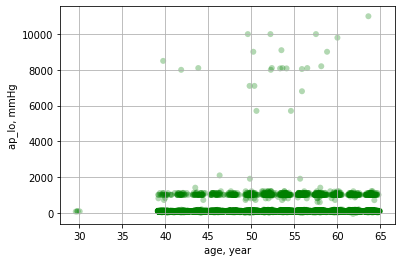

In [53]:
# age = data['age']/365
ap_lo = data['ap_lo']
fig, ax = plt.subplots()
ax.scatter(age, ap_lo, c='green', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('age, year')
plt.ylabel('ap_lo, mmHg')
plt.show()

In [56]:
# люди в возрасте до 35 лет в данном датасете, вероятно, оказались по ошибке
# data.loc[data['age'] <= 35*365]
len(data.loc[data['age'] <= 35*365])

4

In [40]:
len(data.loc[data['ap_lo'] < 0])

1

In [8]:
# исключаем аномальные значения, а также 4-ех человек в возрасте до 35 лет
d = data.iloc[:, 1:].query(
    'ap_hi > ap_lo & \
    40 < ap_hi < 250 & \
    30 < ap_lo < 150 & \
    120 < height < 250 & \
    weight > 40 & \
    age > 35*365')
len(d)

68488

In [8]:
d.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000
mean,19465.515214,1.348922,164.450911,74.157771,126.687040,81.309938,1.364867,1.225879,0.088045,0.053396,0.803352,0.494963
std,2466.645124,0.476633,7.840304,14.250436,16.670146,9.410804,0.679043,0.571768,0.283362,0.224824,0.397467,0.499978
min,14275.000000,1.000000,122.000000,41.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17659.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,207.000000,200.000000,240.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


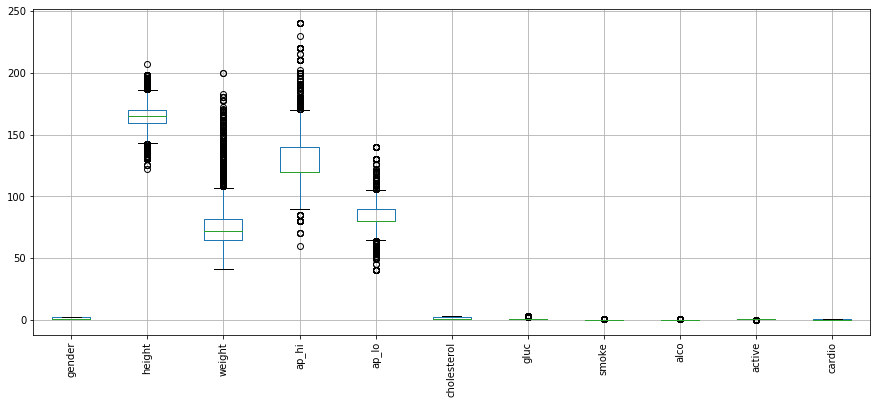

In [9]:
boxplot = d.iloc[:, 1:].boxplot(figsize=(15,6), rot=90)

In [60]:
# boxplot показывает выбросы по 4-ём переменным: height, weight, ap_hi и ap_lo
# пограничные значения, определяемые как границы выбросов:
height_1 = d.height.quantile(.25) - 1.5*(d.height.quantile(.75) - d.height.quantile(.25))
height_2 = d.height.quantile(.75) + 1.5*(d.height.quantile(.75) - d.height.quantile(.25))
print('height:', height_1, '-', height_2)
weight_1 = d.weight.quantile(.25) - 1.5*(d.weight.quantile(.75) - d.weight.quantile(.25))
weight_2 = d.weight.quantile(.75) + 1.5*(d.weight.quantile(.75) - d.weight.quantile(.25))
print('weight:', weight_1, '-', weight_2)
ap_hi_1 = d['ap_hi'].quantile(.25) - 1.5*(d['ap_hi'].quantile(.75) - d['ap_hi'].quantile(.25))
ap_hi_2 = d['ap_hi'].quantile(.75) + 1.5*(d['ap_hi'].quantile(.75) - d['ap_hi'].quantile(.25))
print('ap_hi:', ap_hi_1, '-', ap_hi_2)
ap_lo_1 = d['ap_lo'].quantile(.25) - 1.5*(d['ap_lo'].quantile(.75) - d['ap_lo'].quantile(.25))
ap_lo_2 = d['ap_lo'].quantile(.75) + 1.5*(d['ap_lo'].quantile(.75) - d['ap_lo'].quantile(.25))
print('ap_lo:', ap_lo_1, '-', ap_lo_2)

height: 142.5 - 186.5
weight: 39.5 - 107.5
ap_hi: 90.0 - 170.0
ap_lo: 65.0 - 105.0


In [ ]:
# лишний вес, отклонения от нормы показателей давления, соотношение роста и веса - это те показатели, которые могут быть связаны
# с сердечно-сосудистыми заболеваниями, поэтому оставляем в датасете оставшиеся значения, которые выглядят как выбросы

In [78]:
# d.loc[d['height'] <= 130]
# len(d.loc[d['height'] <= 130])

In [72]:
# Body Mass Index, BMI - индекс массы тела (соотношение роста и веса): характеризует риск возникновения ряда заболеваний,
# включая сердечно-сосудистые
pd.read_html('https://lifehacker.ru/indeks-massy-tela/')[0]

,0,1
0,Соотношение роста и массы тела,Индекс массы тела
1,Дефицит массы тела,"менее 18,5"
2,Норма,"18,5–24,9"
3,Предожирение,"25–29,9"
4,Ожирение I степени,"30–34,9"
5,Ожирение II степени,"35–39,9"
6,Ожирение III степени,более 40


In [10]:
# добавляем в таблицу расчетное значение BMI
d['BMI'] = d.weight / (d.height / 100)**2
d.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [11]:
d.iloc[:, 1:].describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000,68488.000000
mean,1.348922,164.450911,74.157771,126.687040,81.309938,1.364867,1.225879,0.088045,0.053396,0.803352,0.494963,27.458055
std,0.476633,7.840304,14.250436,16.670146,9.410804,0.679043,0.571768,0.283362,0.224824,0.397467,0.499978,5.213850
min,1.000000,122.000000,41.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.527376
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.116213
max,2.000000,207.000000,200.000000,240.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,108.169847


In [ ]:
# можно даже ввести категории, которые затем можно отдельно анализировать:
# d.loc[d.BMI < 18.5, 'type'] = 1 # с дефицитом массы тела
# d.loc[18.5 < d.BMI <= 24.9, 'type'] = 2 # с массой тела в норме
# d.loc[25 < d.BMI <= 29.9, 'type'] = 3 # с избыточной массой тела (предожирением)
# d.loc[d.BMI >= 30, 'type'] = 4 # с ожирением

# кроме того, BMI можно использовать для сокращения кол-ва переменных, удалив из датасета рост и вес 

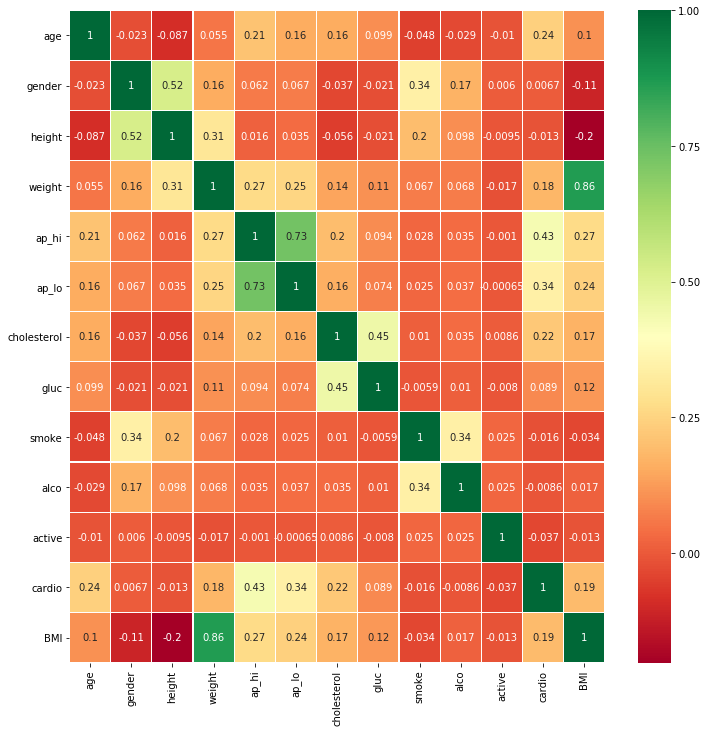

In [85]:
# строим матрицу корреляций, чтобы посмотреть наличие зависимости BMI с переменными height и weight
sns.heatmap(d.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [79]:
# нормализуем параметры
headers = list(d.columns.values)

In [80]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(d)
d_norm = pd.DataFrame(np_scaled)
d_norm.columns = headers
d_norm.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,-0.127357,1.0,0.082353,-0.735849,-0.444444,-0.2,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.841103
1,0.261496,-1.0,-0.200000,-0.446541,-0.111111,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-0.564294
2,-0.029032,-1.0,0.011765,-0.710692,-0.222222,-0.4,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-0.808198
3,-0.290528,1.0,0.105882,-0.484277,0.000000,0.2,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-0.697080
4,-0.322102,-1.0,-0.200000,-0.811321,-0.555556,-0.6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.818804


In [82]:
# boxplot = d_norm.boxplot(figsize=(15,6), rot=90)

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [90]:
X = d_norm.loc[:, 'age':'active'].values # BMI в модель не включаем 
y = d_norm.loc[:, 'cardio'].values

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [92]:
# обучаем модель с помощью класса sklearn класса RandomForestClassifie
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

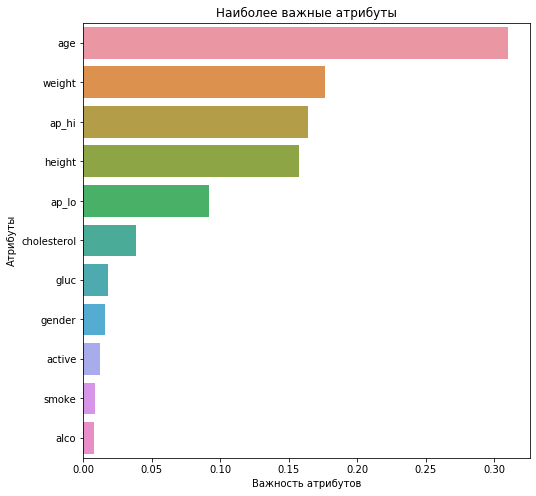

In [93]:
# наиболее важные атрибуты для модели
headers = list(d_norm.loc[:, 'age':'active'].columns.values)

feature_imp = pd.Series(classifier.feature_importances_, index=headers).sort_values(ascending=False) 

f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
# plt.legend()
plt.show()

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

In [ ]:
# возраст - самый важный атрибут, оказывающий влияние на сердечно-сосудистые заболевания
# при этом возраст в датасете представлен значениями 40 лет и старше

In [94]:
# формируем прогноз
y_pred = classifier.predict(X_test)

In [96]:
# результаты
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[7513 2807]
 [3165 7062]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.70      0.73      0.72     10320
         1.0       0.72      0.69      0.70     10227

    accuracy                           0.71     20547
   macro avg       0.71      0.71      0.71     20547
weighted avg       0.71      0.71      0.71     20547

Accuracy: 0.7093492967343165


Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

In [5]:
# Тестируем гипотезу, что здоровые и имеющие заболевание не отличаются по возрасту
diseased = d[d['cardio']==1]['age']
healthy = d[d['cardio']==0]['age']
descriptives, results = rp.ttest(diseased, healthy) 
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N          Mean           SD         SE     95% Conf.  \
0       age  33899.0  20061.479926  2316.141863  12.579741  20036.823205   
1       age  34589.0  18881.439128  2469.964717  13.280724  18855.408477   
2  combined  68488.0  19465.515214  2466.645124   9.425392  19447.041459   

       Interval  
0  20086.136646  
1  18907.469779  
2  19483.988970  
_______________________________________
          Independent t-test     results
0  Difference (age - age) =    1180.0408
1      Degrees of freedom =   68486.0000
2                       t =      64.4667
3   Two side test p value =       0.0000
4  Difference < 0 p value =       1.0000
5  Difference > 0 p value =       0.0000
6               Cohen's d =       0.4927
7               Hedge's g =       0.4927
8           Glass's delta =       0.5095
9                       r =       0.2392


In [ ]:
# значение показателя p-value (0.00) < 0.05, гипотеза неверна

In [8]:
# для сравнения исп. другой тест, который подтверждает сделанный вывод
statistics.variance(diseased), statistics.variance(healthy)

(5364513.129302301, 6100725.702355849)

In [9]:
# scipy.stats.ttest_ind: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html
# поскольку дисперсии отличаются, то указываем equal_var=False - т.е. исп. не классический тест, который
# учитывает разницу дисперсий:
sts.ttest_ind(diseased, healthy, equal_var=False)

Ttest_indResult(statistic=64.50838892194554, pvalue=0.0)

In [10]:
np.mean(diseased), np.mean(healthy)

(20061.479925661522, 18881.439128046488)

In [12]:
# Тестируем гипотезу, что имеющие заболевание мужчины и женщины не отличаются по возрасту
women = d.loc[(d['gender']==1) & (d['cardio']==1),'age']
men = d.loc[(d['gender']==2) & (d['cardio']==1),'age']
descriptives, results = rp.ttest(women, men)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N          Mean           SD         SE     95% Conf.  \
0       age  21961.0  20139.329493  2266.093429  15.291559  20109.356937   
1       age  11938.0  19918.268805  2398.999199  21.956561  19875.230373   
2  combined  33899.0  20061.479926  2316.141863  12.579741  20036.823205   

       Interval  
0  20169.302049  
1  19961.307238  
2  20086.136646  
_______________________________________
          Independent t-test     results
0  Difference (age - age) =     221.0607
1      Degrees of freedom =   33897.0000
2                       t =       8.4021
3   Two side test p value =       0.0000
4  Difference < 0 p value =       1.0000
5  Difference > 0 p value =       0.0000
6               Cohen's d =       0.0955
7               Hedge's g =       0.0955
8           Glass's delta =       0.0976
9                       r =       0.0456


In [ ]:
# значение показателя p-value (0.00) < 0.05, гипотеза неверна

In [13]:
# совокупности различаются по количеству почти вдвое, исп. выборки по размеру меньшей 
women_= women.sample(n=10000)
men_ = men.sample(n=10000)

In [14]:
statistics.variance(women_), statistics.variance(men_)

(5046591.765640204, 5688416.780629063)

In [15]:
sts.ttest_ind(women_, men_, equal_var=False)

Ttest_indResult(statistic=6.481513464950787, pvalue=9.293404570212529e-11)